# Final Project 1 - Uber and Lyft Dataset Boston, MA

## Uber dan Lyft

**Uber** merupakan salah satu perusahaan ridesharing multinasional Amerika yang menawarkan layanan yang mencakup ridesharing peer to peer, layanan tumpangan, pengiriman makanan, dan sistem mikromobilitas dengan sepeda listrik dan skuter. Perusahaan ini berbasis di San Francisco dan beroperasi di lebih dari 785 wilayah metropolitan di seluruh dunia. Platform uber dapat diakses melalui situs web dan aplikasi seluler. 

**Lyft** juga merupakan perusahaan ridesharing yang berbasis di San Francisco, California dan beroperasi di 640 kota di Amerika serikat dan 9 Kota di Kanada. Lyft dikembangkan, dipasarkan, dan dioperasikan melalui aplikasi seluler. Lyft menawarkan tumpangan mobil, skuter, sistem berbagi sepeda, dan layanan pengiriman makanan. Berdasarkan Socond Meassure, Lyft adalah perusahaan ridesharing terbesar kedua di Amerika Serikat dengan pangsa pasar 28% setelah Uber.

## Linear Regression 

**Linear Regression** atau regresi linier adalah salah satu teknik statistik yang digunakan untuk mengetahui hubungan linear antara variabel independen (features) terhadap variabel dependennya (target). Regresi termasuk dalam Supervised Learning. Secara umum, persamaan regresi linear dengan $n$ variabel independen adalah sebagai berikut:

$y = \beta_0 + \beta_i x_i+ e; i = 1, 2, ..., n$

dengan 

$y$ : variabel dependen/respon/target

$\beta_0$ : intercept

$\beta_i$ : koefisien regresi/ slope ke-$i$

$x_i$ :variabel independen/fetures/prediktor ke-i

$e$ : galat/error


Linear Regression menghitung estimator dari koefisien regresi atau predicted weights dilambangkan dengan $\beta_0,\beta_1, \beta_2, ..., \beta_n.$ Koefisien regresi ini mendefinisikan estimasi fungsi regresi dan harus menangkap ketergantungan antar variabel dengan baik. Hasil prediksi dari fungsi regresi yang didapat untuk setiap pengamatan harus sedekat mungkin dengan actual response sesuai dengan $y_i$. Selisih antara hasil prediksi dengan nilai sebenarnya disebut dengan galat. Regresi adalah tentang menentukan best predicted weights, yaitu nilai/bobot yang sesuai dengan galat terkecil. Untuk mendapatkan bobot terbaik, biasanya kita meminimalkan Sum of Square Residuals (SSR) untuk semua pengamatan. Pendekatan ini dinamakan Ordinary Least Square (OLS).

Untuk mengetahui seberapa baik performa fungsi regresi yang didapat biasanya menggunakan nilai koefisien determinasi dilambangkan dengan $R^2$. Nilai ini memberi tahu kita berapa banyak variasi dalam  yang dapat dijelaskan oleh ketergantungan pada $x$ . Lebih besar nilai $R^2$ menunjukkan kesesuaian yang lebih baik dan berarti bahwa model/fungsi yang didapat menjelaskan variasi keluaran dengan masukan yang berbeda dengan baik.

## Prediksi Harga Uber and Lyft Dataset Boston, MA Menggunakan Metode *Linear Regression* 
Pada Project kali ini akan dilakukan analis **Regresi Linier** untuk menentukan harga yang dilkeluarkan untuk menggunakan rideshare uber ataupun lyft. Data yang digunakan merupakan dataset Uber and Lyft Dataset Boston, MA yang mencatat pemesanan perjalanan taksi Uber dan Lyft di kota Boston selama November dan Desember 2018, diakses melalui https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma. Dataset ini terdiri dari 693071 baris (total observasi) dengan total fitur/kolom sebanyak 57. 

Pada analisis Regresi Logistik kali ini, dari 57 kolom yang diberikan akan dipilih 10 kolom dengan 1 kolom yaitu **price** atau harga untuk perjalanan (USD) dijadikan sebagai Target dan 9 kolom lainnya  sebagai variabel bebas (feature) diantaranya :
- distance : jarak yang ditempuh 
- surge_multiplier : penggandaan harga
- visibility.1	: visibilitas
- cab_type : tipe rideshare Uber or Lyft
- name : jenis kendaraan yang digunakan


Metode **Linear Regression** akan digunakan untuk mengetahui bagaimana pengaruh 9 feature di atas terhadap variasi harga/tarif rideshare. 

## Import Pustaka yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Loading

In [3]:
# membaca dataset

df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# mengecek tipe data tiap features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Interpretasi:** output di atas merupakan seluruh variabel yang terdapat dari dataset rideshare yang berjumlah 57 variabel.

In [5]:
# mengecek size dataframe

df.shape

(693071, 57)

**Interpretasi:** dataframe yang digunakan memiliki total observasi 693071 dan total variabel 57

In [6]:
# melihat rangkuman statistik dataframe

df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

**Interpretasi:** Output di atas menunjukkan statistik deskriptif dari seluruh variabel dari dataset rideshare.

## Explorasi Data

### Histogram Perbandingan Jumlah Uber dan Lyft

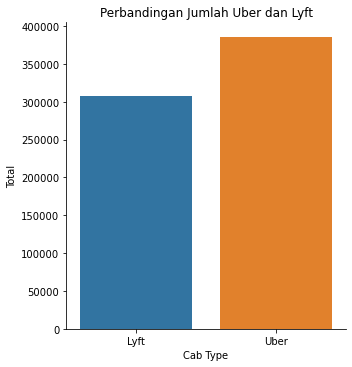

In [7]:
# perbandingan antara jumlah Uber dan Lyft yang dipesan

cab_type = sns.catplot(x='cab_type',data=df,kind='count')
cab_type.set_axis_labels('Cab Type', 'Total')
cab_type.set(title='Perbandingan Jumlah Uber dan Lyft')
plt.show()

**Interpretasi:** Output di atas menunjukkan perbandingan jumlah data dengan cab type Uber dan Lyft dengan total perjalanan yang menggunakan kendaraan dari type uber lebih banyak dari total lyft.

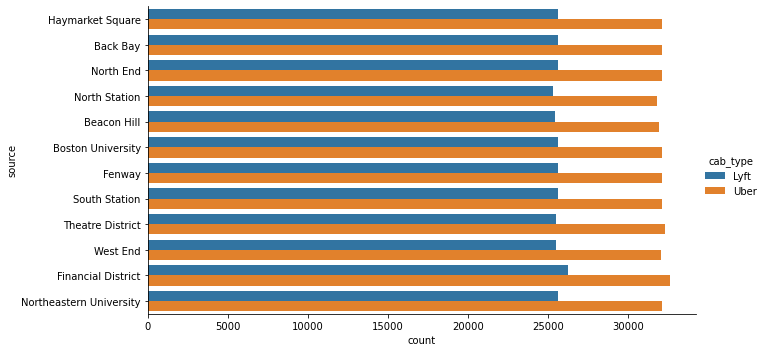

In [8]:
# perbandingan antara Uber dan Lyft pada setiap wilayah di Boston 

mostly_used = sns.catplot(y='source',data=df,kind='count',hue='cab_type',aspect=(20/10))
plt.show()

**Interpretasi:** Output di atas menunjukkan perbandingan jumlah data dengan cab type Uber dan Lyft yang terdapat di setiap wilayah di boston. Uber lebih banyak digunakan daripada Lyft pada seluruh wilayah Boston

### Distribusi Perjalanan dalam Satu Hari

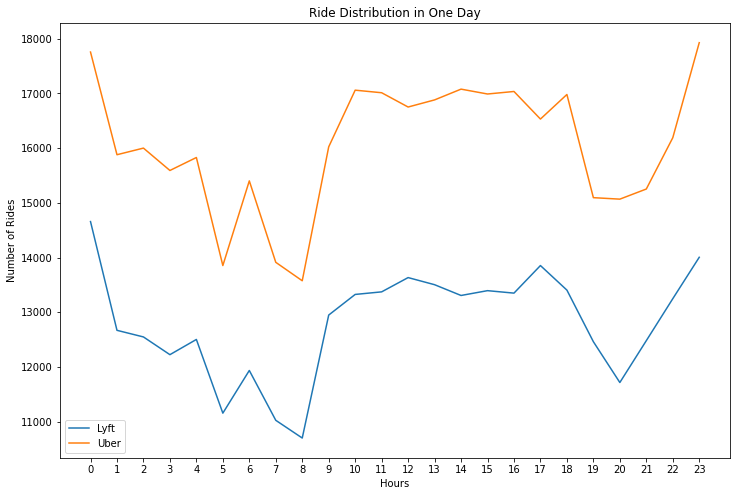

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(
    df[df["cab_type"] == "Lyft"]
    .groupby("hour")
    .hour.count()
    .index,
    df[df["cab_type"] == "Lyft"]
    .groupby("hour")
    .hour.count(),
    label="Lyft",
)
ax.plot(
    df[df["cab_type"] == "Uber"]
    .groupby("hour")
    .hour.count()
    .index,
    df[df["cab_type"] == "Uber"]
    .groupby("hour")
    .hour.count(),
    label="Uber",
)
ax.legend()
ax.set(xlabel="Hours", ylabel="Number of Rides", title="Ride Distribution in One Day")
plt.xticks(range(0, 24, 1))
plt.show()

**Interpretasi** Uber dan Lyft paling banyak digunakan pada tengah malam (00.00) dan paling sedikit digunakan pada pukul 8 pagi

### Korelasi Antara Distance dan Price

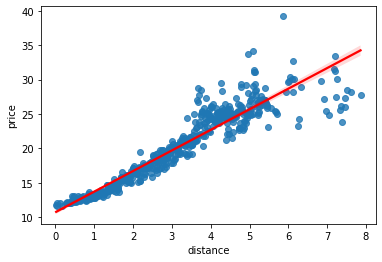

In [10]:
# mencari korelasi antara distance dan price

distances = df.groupby('distance')['price'].mean()
sns.regplot(x=distances.index,y=distances,scatter=True,line_kws={'color':'red'})
plt.show()

**Interpretasi:** Price dan distance berkorelasi positif, yang berarti semakin jauh jarak yang ditempuh semakin tinggi juga harga yang harus dibayarkan

### Korelasi Antara Temperature dan Price
Selanjutnya, akan dicari korelasi antar variabel (features)  yang terdapat pada dataset rideshare. pertama dicari korelasi features temperature, apparentTemperature, temperatureHigh, temperatureLow, apparentTemperatureHigh, apparentTemperatureLow, temperatureMin, temperatureHighTime, temperatureMax, apparentTemperatureMin, dan apparentTemperatureMax, terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [11]:
# membuat dataframe khusus features temparature agar dapat digunakan kembali ketika dibutuhkan

temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [12]:
df_temp = df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

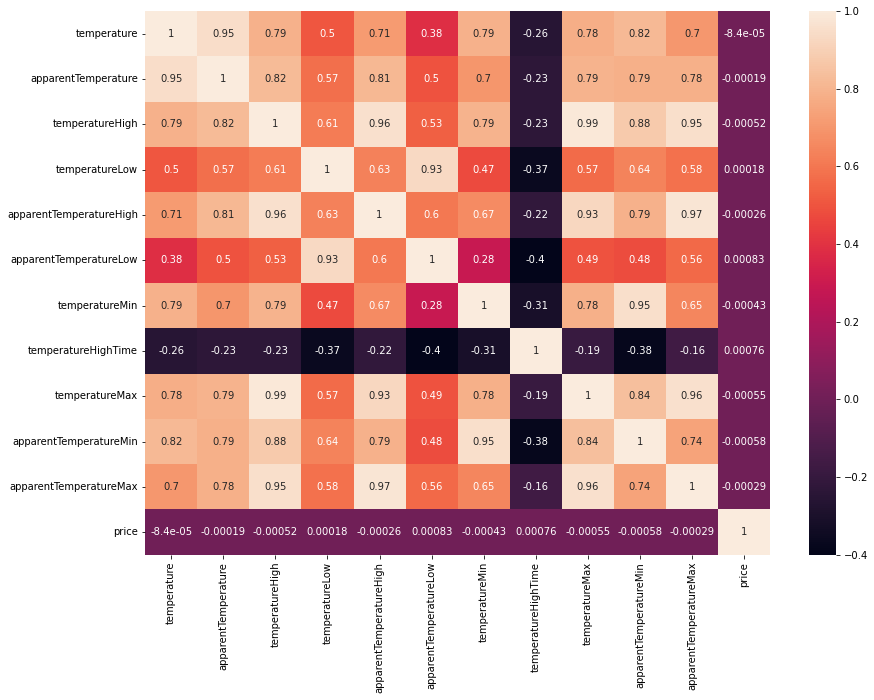

In [13]:
# mencari korelasi antara dataframe temperature dengan target untuk menentukan variabel terbaik yang dapat digunakan

plt.figure(figsize=(14,10))
sns.heatmap(df_temp.corr(),annot=True)

**Interpretasi:** Features temperature berkorelasi rendah dengan target (price) sehingga features temperature tidak akan digunakan.

### Korelasi Antara Climate dan Price

Selanjutnya akan dicari korelasi features Climate yaitu, precipIntensity, precipProbability, humidity, windSpeed, windGust, visibility, dewPoint, pressure, windBearing, cloudCover, uvIndex, ozone, moonPhase, precipIntensityMax, terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [14]:
# membuat dataframe khusus features climate

climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

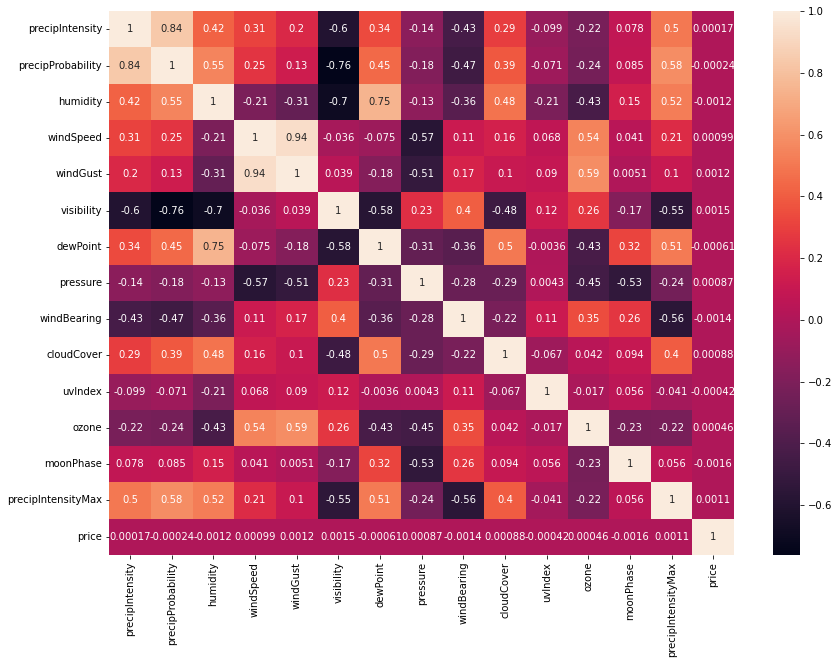

In [15]:
# mencari korelasi antara dataframe climate dengan target

plt.figure(figsize=(14,10))
sns.heatmap(df_clim.corr(),annot=True)

**Interpretasi:** Features climate berkorelasi lemah dengan target (price)

### Korelasi Antara Timestamp dan Price

Selanjutnya dicari korelasi features Timestamp (hour, day, month) terhadap variabel price yang akan dijadikan sebagai variabel terikat (target).

In [16]:
df_timestamp = df[['hour', 'day', 'month', 'price']]
df_timestamp.head()

,hour,day,month,price
0,9,16,12,5.0
1,2,27,11,11.0
2,1,28,11,7.0
3,4,30,11,26.0
4,3,29,11,9.0


<AxesSubplot:>

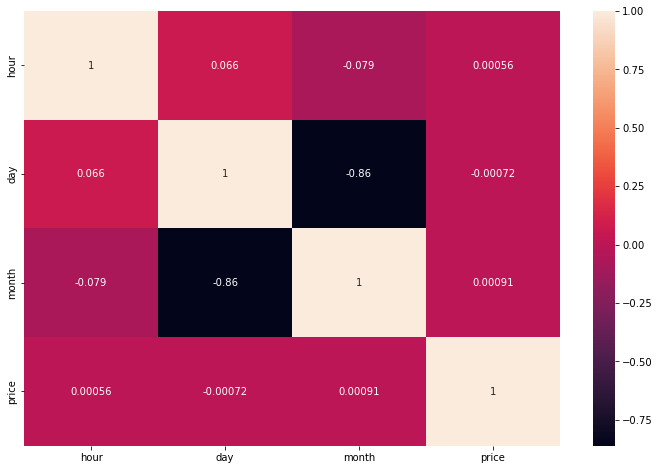

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df_timestamp.corr(),annot=True)

**Interpretasi:** Feature hour, day, dan month berkorelasi rendah dengan price

## Data Cleaning

dilakukan penghapusan features yang memiliki korelasi rendah terhadap price.

In [18]:
# menghapus kolom yang berkorelasi lemah dengan target

new_df = df.drop(['id', 'product_id', 'timestamp','hour','day','month', 'timezone', 'latitude', 'longitude',
                 'datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime',
                  'temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                  'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
                  'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
                  'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax'], axis = 1)

In [19]:
new_df.shape

(693071, 10)

didapatkan dataframe baru dengan ukuran 693071 dengan 9 features dan 1 target.

In [20]:
new_df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000


## Data Preprocessing
Sebelum melakukan analisis data, dilakukan terlebih dahulu langkah prepocessing data agar data yang akan dianalisis sudah cukup baik sehingga tidak terjadi *garbage in* dan *garbage out*.

### Handling Missing Value

In [21]:
# mengecek missing value

new_df.isnull().sum()

source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
short_summary           0
icon                    0
visibility.1            0
dtype: int64

Terdapat missing value pada target, yaitu Price sebanyak 55095

Untuk menentukan apakah missing value tersebut harus dihapus atau diisi, cek persamaan pada missing value

In [22]:
# membuat dataframe baru yang terdiri dari beberapa feature yang mempengaruhi value price

df_cek = df[['price', 'name', 'distance', 'short_summary']]

In [23]:
df_cek

,price,name,distance,short_summary
0,5.0,Shared,0.44,Mostly Cloudy
1,11.0,Lux,0.44,Rain
2,7.0,Lyft,0.44,Clear
3,26.0,Lux Black XL,0.44,Clear
4,9.0,Lyft XL,0.44,Partly Cloudy
...,...,...,...,...
693066,13.0,UberXL,1.00,Partly Cloudy
693067,9.5,UberX,1.00,Partly Cloudy
693068,NaN,Taxi,1.00,Partly Cloudy
693069,27.0,Black SUV,1.00,Partly Cloudy


In [24]:
# urutkan dataframe berdasarkan distance

df_sorted = df_cek.sort_values('distance')

In [25]:
df_sorted.head(25)

,price,name,distance,short_summary
227442,NaN,Taxi,0.02,Rain
11277,7.5,UberPool,0.02,Partly Cloudy
514756,6.5,UberX,0.02,Clear
514755,15.0,Black,0.02,Clear
514754,27.5,Black SUV,0.02,Clear
172936,8.5,UberXL,0.02,Partly Cloudy
172935,15.0,Black,0.02,Partly Cloudy
514757,NaN,Taxi,0.02,Clear
172934,6.5,WAV,0.02,Clear
172933,NaN,Taxi,0.02,Clear


Berdasarkan data diatas, dapat dilihat bahwa missing value terdapat pada semua atribut taxi. Untuk mengkonfirmasi kembali, tampilkan data yang memiliki name 'Taxi'

In [26]:
df_sorted.loc[(df_sorted['name'] == 'Taxi')]

,price,name,distance,short_summary
227442,NaN,Taxi,0.02,Rain
514757,NaN,Taxi,0.02,Clear
172933,NaN,Taxi,0.02,Clear
598125,NaN,Taxi,0.02,Overcast
222985,NaN,Taxi,0.02,Overcast
...,...,...,...,...
227026,NaN,Taxi,7.50,Overcast
498498,NaN,Taxi,7.50,Clear
87438,NaN,Taxi,7.50,Drizzle
264126,NaN,Taxi,7.62,Clear


Berdasarkan hasil diatas, semua 'Taxi' tidak memiliki value pada price dan jumlahnya sama dengan jumlah missing value diseluruh dataframe. Jadi, dapat disimpulkan bahwa missing value pada dataset ini dapat dihapus.

In [27]:
new_df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon,visibility.1
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night,10.000
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain,4.786
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night,10.000
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night,10.000
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night,10.000


In [28]:
# menghapus semua data 'Taxi'

new_df.drop(df.index[df['name'] == 'Taxi'], inplace=True)

In [29]:
new_df.shape

(637976, 10)

In [30]:
# mengecek apakah masih ada missing value

new_df.isnull().sum().sum()

0

Missing value sudah tidak ada

Terdapat beberapa feature yang berkategori kategori, sehingga features tersebut harus di encode terlebih dahulu sebelum dicari korelasinya. Feature yang bertipe kategori, yaitu source, destination, cab_type, short_summary, dan icon dapat di encode menggunakan *encode* dan feature name di encode menggunakan *pd.get_dummies()* karena secara numerik kategori pada 'name' tidak sesuai

### Korelasi Antara Feature Bertipe Kategori (Kecuali Name) dengan Price

In [31]:
# mencari korelasi antara categorycal features dengan target

new_cat = ['source',
 'destination',
 'cab_type',
 'short_summary',
 'icon','price']

df_cat = new_df[new_cat]
df_cat.head()

,source,destination,cab_type,short_summary,icon,price
0,Haymarket Square,North Station,Lyft,Mostly Cloudy,partly-cloudy-night,5.0
1,Haymarket Square,North Station,Lyft,Rain,rain,11.0
2,Haymarket Square,North Station,Lyft,Clear,clear-night,7.0
3,Haymarket Square,North Station,Lyft,Clear,clear-night,26.0
4,Haymarket Square,North Station,Lyft,Partly Cloudy,partly-cloudy-night,9.0


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat_encode= df_cat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [33]:
df_cat_encode

,source,destination,cab_type,short_summary,icon,price
0,5,7,0,4,5,5.0
1,5,7,0,8,6,11.0
2,5,7,0,0,1,7.0
3,5,7,0,0,1,26.0
4,5,7,0,6,5,9.0
...,...,...,...,...,...,...
693065,11,6,1,6,5,9.5
693066,11,6,1,6,5,13.0
693067,11,6,1,6,5,9.5
693069,11,6,1,6,5,27.0


<AxesSubplot:>

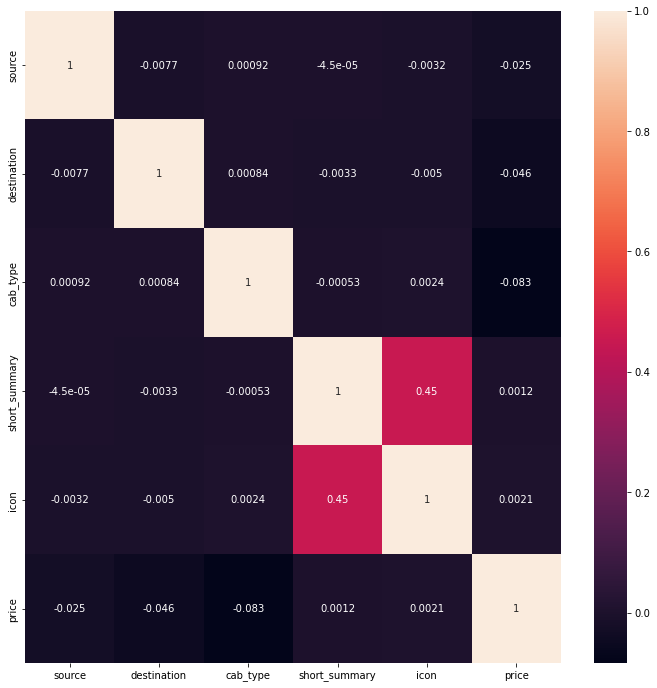

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cat_encode.corr(),annot=True)

### Korelasi Antara Name dan Price

In [35]:
# encode feature name

df_name = pd.get_dummies(new_df['name'])

In [36]:
df_name

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1
693066,0,0,0,0,0,0,0,0,0,0,1,0
693067,0,0,0,0,0,0,0,0,0,1,0,0
693069,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
df_name_corr = pd.concat([df_name, df['price']], axis=1)
df_name_corr

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0
693067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.5
693068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


<AxesSubplot:>

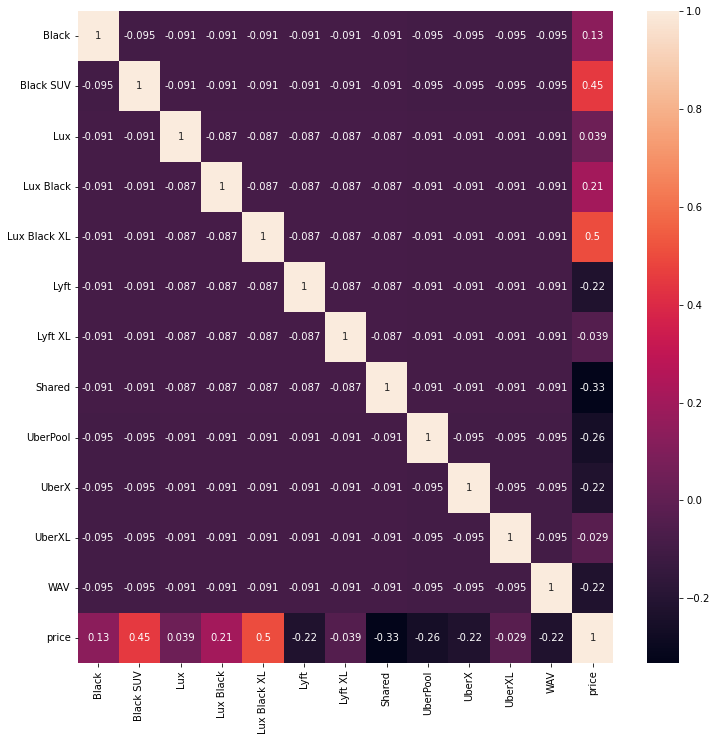

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df_name_corr.corr(),annot=True)

In [39]:
# menghapus features source, destination, dan icon karena dinilai tidak memiliki korelasi yang cukup baik
# features name dan short-summary tidak dihapus. walaupun nilai korelasinya kurang. tetapi kedua features tersebut cukup mempengaruhi value target

new_df = new_df.drop(['source','destination','icon'],axis=1)
new_df.head()

,cab_type,name,price,distance,surge_multiplier,short_summary,visibility.1
0,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,10.000
1,Lyft,Lux,11.0,0.44,1.0,Rain,4.786
2,Lyft,Lyft,7.0,0.44,1.0,Clear,10.000
3,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,10.000
4,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,10.000


In [40]:
# menambahkan features name dan short summary yang telah di-encode ke new_df

new_df = new_df.drop(['name', 'short_summary', 'cab_type'], axis = 1)
df_cat_encode = df_cat_encode[['cab_type']]
new_df = pd.concat([new_df, df_cat_encode, df_name], axis=1)

In [41]:
new_df.shape

(637976, 17)

In [42]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             637976 non-null  float64
 1   distance          637976 non-null  float64
 2   surge_multiplier  637976 non-null  float64
 3   visibility.1      637976 non-null  float64
 4   cab_type          637976 non-null  int32  
 5   Black             637976 non-null  uint8  
 6   Black SUV         637976 non-null  uint8  
 7   Lux               637976 non-null  uint8  
 8   Lux Black         637976 non-null  uint8  
 9   Lux Black XL      637976 non-null  uint8  
 10  Lyft              637976 non-null  uint8  
 11  Lyft XL           637976 non-null  uint8  
 12  Shared            637976 non-null  uint8  
 13  UberPool          637976 non-null  uint8  
 14  UberX             637976 non-null  uint8  
 15  UberXL            637976 non-null  uint8  
 16  WAV               63

**Kesimpulan:** Jadi, hasil dari cleaning data dan preprocessing data adalah terdapat 693071 baris dan 10 kolom yang dianggap paling relevan

## Baseline Model
berdasarkan hasil preprocessing yang dilakukan, akan dilakukan pembuatan model linear regression menggunakan library sklearn.linear_model.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [69]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


In [70]:
x = new_df.drop('price', axis =1)
y = new_df['price']

In [71]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [72]:
r2_base = model.score(x, y)
print('coefficient of determination:', r2_base)

coefficient of determination: 0.9272719085109441


In [73]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 147080663857.46725
slope: [ 2.79467925e+00  1.83270051e+01  1.99342297e-04  2.99002325e+10
 -1.76980896e+11 -1.76980896e+11 -1.47080664e+11 -1.47080664e+11
 -1.47080664e+11 -1.47080664e+11 -1.47080664e+11 -1.47080664e+11
 -1.76980896e+11 -1.76980896e+11 -1.76980896e+11 -1.76980896e+11]


Dari proses di atas didapatkan model dengan nilai koefisien determinasi sebesar 0.9272719085109441.

## Data Preprocessing #2

### Normalisasi Data Menggunakan MinMax Scaler

In [44]:
new_df.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,5.0,0.44,1.0,10.000,0,0,0,0,0,0,0,0,1,0,0,0,0
1,11.0,0.44,1.0,4.786,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,10.000,0,0,0,0,0,0,1,0,0,0,0,0,0
3,26.0,0.44,1.0,10.000,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.0,0.44,1.0,10.000,0,0,0,0,0,0,0,1,0,0,0,0,0


Selanjutnya dilakukan normalisasi data untuk memperbaiki model yang terbentuk dan meningkatkan nilai koefisien korelasi dari model yang terbentuk.

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
scaled = scaler.fit_transform(new_df)
print(scaled)

[[0.02631579 0.05357143 0.         ... 0.         0.         0.        ]
 [0.08947368 0.05357143 0.         ... 0.         0.         0.        ]
 [0.04736842 0.05357143 0.         ... 0.         0.         0.        ]
 ...
 [0.07368421 0.125      0.         ... 1.         0.         0.        ]
 [0.25789474 0.125      0.         ... 0.         0.         0.        ]
 [0.07894737 0.125      0.         ... 0.         0.         0.        ]]


In [47]:
df_scaled = pd.DataFrame({"price":scaled[:,0],"distance":scaled[:,1],
                         "surge_multiplier":scaled[:,2],"visibility.1":scaled[:,3],
                         "cab_type":scaled[:,4], "Black":scaled[:,5],"Black SUV":scaled[:,6],
                         "Lux":scaled[:,7], "Lux Black":scaled[:,8], "Lux Black XL":scaled[:,9],
                         "Lyft":scaled[:,10], "Lyft XL":scaled[:,11], "Shared":scaled[:,12],
                         "UberPool":scaled[:,13], "UberX":scaled[:,14],
                         "UberXL":scaled[:,15],"WAV":scaled[:,16]})

In [48]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_scaled.shape

(637976, 17)

### Removing Outliers

In [50]:
Qp12 = df_scaled['price'].quantile(0.25)
Qp32 = df_scaled['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [51]:
df_scaled[df_scaled['price']>(Qp32+(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
645,0.526316,0.411990,0.500,0.989120,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.684211,0.411990,0.500,0.981364,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.452632,0.604592,0.000,0.995906,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.452632,0.547194,0.000,0.141441,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,0.452632,0.677296,0.000,0.957772,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,0.468421,0.706633,0.000,0.979317,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637637,0.526316,0.581633,0.125,0.961327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637813,0.473684,0.688776,0.000,0.080039,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637878,0.510526,0.936224,0.000,0.988043,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_scaled[df_scaled['price']<(Qp12-(1.5*IQRp))]

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV


In [53]:
print('Size before removing :',df_scaled.shape)
df_scaled= df_scaled[~((df_scaled['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',df_scaled.shape)

Size before removing : (637976, 17)
Size after removing : (632387, 17)


In [54]:
df_scaled.head()

,price,distance,surge_multiplier,visibility.1,cab_type,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.026316,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.089474,0.053571,0.0,0.438328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.247368,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.068421,0.053571,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data = df_scaled[['price','distance']]
data.describe()

,price,distance
count,632387.000000,632387.000000
mean,0.144688,0.274516
std,0.092311,0.142408
min,0.000000,0.000000
25%,0.068421,0.159439
50%,0.115789,0.270408
75%,0.210526,0.367347
max,0.421053,1.000000


## Pendefinisian Model

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# menentukan feature
X = df_scaled.drop('price', axis =1)
y = df_scaled['price']

In [58]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Melatih Model
setelah model awal terbentuk akan dilihat kembali model yang akan terbentuk setelah dilakukan preprocessing lanjutan. menggunakan library sklearn dan statsmodel.

### LinearRegression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [60]:
reg = LinearRegression()

In [61]:
# Fit to data training
model = reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [62]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(r2)
print(mse)
print(rmse)

0.9328629804216493
0.0005705676253120387
0.023886557418599248


didapatkan nilai koefisein determinasi **$r^2$** sebesar 0.9328629804216493 yang lebih besar dari $r^2$ awal sebesar 0.9272719085109441, nilai **MSE** (*Mean Square Error*) sebesar 0.00057 dan nilai **RMSE** (*Root Mean Square Error*) sebesar 0.02388, maka model ini akan digunakan. 

Selanjutnya, akan dilihat nilai koefisien regresi dan nilai intersep dari model yang dipilih.

In [63]:
print("Nilai koefisien regresi:\n", model.coef_)
print("Nilai intersep:\n", model.intercept_)

Nilai koefisien regresi:
 [ 2.20487453e-01  2.88623866e-01 -2.73582733e-05  2.51216521e+09
 -4.61758798e+09 -4.61758797e+09 -2.10542277e+09 -2.10542277e+09
 -2.10542277e+09 -2.10542277e+09 -2.10542277e+09 -2.10542277e+09
 -4.61758798e+09 -4.61758798e+09 -4.61758798e+09 -4.61758798e+09]
Nilai intersep:
 2105422766.0190246


dilakukan perhitungan model menggunakan statsmodels.api

In [64]:
import statsmodels.api as sm

In [65]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 5.909e+05
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:28:54   Log-Likelihood:             1.4660e+06
No. Observations:              632387   AIC:                        -2.932e+06
Df Residuals:                  632371   BIC:                        -2.932e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
distance             0.2206      0.000   1045.904      0.000       0.220       0.221
surge_multiplier     0.2875      0.001    390.335      0.000       0.286       0.289
visibility.1      -1.32e-05      0.000     -0.117      0.907      -0.000       0.000
cab_type          7.005e+08    9.6e+08      0.729      0.466   -1.18e+09    2.58e+09
Black            -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
Black SUV        -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
Lux                  0.0941      0.000    626.489      0.000       0.094       0.094
Lux Black            0.1483      0.000    986.793      0.000       0.148       0.149
Lux Black XL         0.2395      0.000   1583.394      0.000       0.239       0.240
Lyft                 0.0084      0.000     55.820      0.000       0.008       0.009
Lyft XL              0.0683      0.000    454.753      0.000       0.068       0.069
Shared              -0.0238      0.000   -159.281      0.000      -0.024      -0.024
UberPool         -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
UberX            -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
UberXL           -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
WAV              -7.005e+08    9.6e+08     -0.729      0.466   -2.58e+09    1.18e+09
==============================================================================
Omnibus:                   127612.786   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           635552.011
Skew:                           0.895   Prob(JB):                         0.00
Kurtosis:                       7.573   Cond. No.                     9.49e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.79e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Berdasarkan proses di atas, model yang terbentuk adalah sebagai berikut. 

Misal :

$x_1$ = distance

$x_2$ = surge_multiplier

$x_3$ = visibility.1	

$x_4$ = cab_type

$x_5$ = Black	

$x_6$ = Black SUV

$x_7$ = Lux

$x_8$ = Lux Black

$x_9$ = Lux Black XL

$x_{10}$ = Lyft

$x_{11}$ = Lyft XL

$x_{12}$ = Shared

$x_{13}$ = UberPool

$x_{14}$ = UberX	

$x_{15}$ =UberXL	

$x_{16}$ = WAV


Model yang didapatkan :

$y$ = 2105422766.0190246 + 0.2206$x_1$ + 0.2875$x_2$ - 1.32e-05$x_3$ + 7.005e+08$x_4$ - 7.005e+08$x_5$ - 7.005e+08$x_6$ 0.0941$x_7$ + 0.1483$x_8$ + 0.2395$x_9$ + 0.0084$x_{10}$ + 0.0683$x_{11}$ -0.0238$x_{12}$ -7.005e+08$x_{13}$  - 7.005e+08$x_{14}$ - 7.005e+08$x_{15}$ - 7.005e+08$x_{16}$ + $e$

Selanjutnya akan dilihat bagaimana plot perbandingan antara nilai asli dengan nilai prediksinya menggunakan metode Regresi Linier dengan 5 feature yaitu distance,Surge Multiplier, visibility, cab type dan name :

In [74]:
#Membuat array dari nilai y_test
y_test_vis = np.array(y_test)
y_test_vis

array([0.17894737, 0.05789474, 0.08421053, ..., 0.04736842, 0.14210526,
       0.02631579])

In [75]:
y_pred

array([0.16329694, 0.05132365, 0.05447459, ..., 0.02614427, 0.15035987,
       0.04224563])

In [76]:
#Membuat dataframe nilai y_test dan y_prabsed
resid = pd.DataFrame(y_pred, y_test_vis)
resid = resid.reset_index()
resid = resid.rename(columns={"index":"actual_val",
                             0:"predict_val"})

In [77]:
#Menambahkan kolom dari selisih antara nilai y_test dan y_pred
resid["residual"] = resid["actual_val"] - resid["predict_val"]
resid

,actual_val,predict_val,residual
0,0.178947,0.163297,0.015650
1,0.057895,0.051324,0.006571
2,0.084211,0.054475,0.029736
3,0.052632,0.036866,0.015765
4,0.263158,0.273769,-0.010611
...,...,...,...
158092,0.178947,0.154661,0.024286
158093,0.178947,0.164666,0.014282
158094,0.047368,0.026144,0.021224
158095,0.142105,0.150360,-0.008255


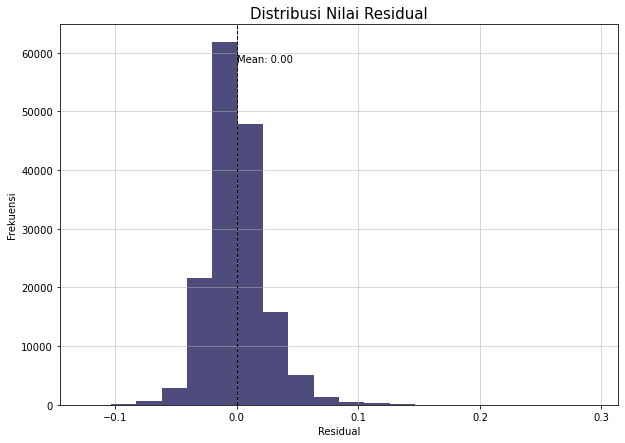

In [78]:
#Plotting
dist_resid = resid["residual"]
dist_resid.plot(kind="hist", figsize=(10,7), bins=20, color="#4D4C7D")
plt.title("Distribusi Nilai Residual", fontsize=15)
plt.xlabel("Residual", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(linewidth=0.5)
plt.axvline(dist_resid.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dist_resid.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dist_resid.mean()))
plt.show()

Berdasarkan plot di atas, dapat dilihat bahwa nilai residual model menyebar di sekitar 0 dengan mean = 0.00. yang berartiresidual berdistribusi normal dan memenuhi salah satu asumsi klasik regresi linear. Dapat dikatakan bahwa model regresi yang didapat baik dalam memprediksi nilai variabel dependennya.

## Model Inference

Untuk menguji keakuratan model yang terpilih, dilakukan model inference untuk menguji model dengan data di luar.

Misalkan seseorang ingin melihat berapa prediksi harga taksi yang harus ia keluarkan dengan jarak yang ingin ditempuh sejauh 4 KM. Ia ingin menggunakan taksi Uber dengan tipe taksi UberX sehingga tidak berlaku adanya penggandaan harga, dengan visibility 3.

In [81]:
distance = float(input("Distance:"))
surge = float(input("Surge Multiplier:"))
visibility = float(input("visibility.1:"))
ride = input("Ride Types:")
types = input("Uber/Lyft?")

val = [distance, surge, visibility]

cab_types = {"Uber":0,
            "Lyft":1}

for i in range(0,2):
    if cab_types[types]==i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {"UberX" : 0,
                 "UberXL" : 1,
                 "Black" : 2,
                 "BlackSUV": 3,
                 "WAV" : 4,
                 "UberPool" : 5,
                 "Shared" : 6,
                 "Lyft" : 7,
                 "LyftXL" : 8,
                 "Lux": 9,
                 "LuxBlack" : 10,
                 "LuxBlackXL" : 11}

for i in range(0,11):
    if ride_types[ride]==i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = model.predict([val])

print("Here's your estimated price:", predict)

Distance:4
Surge Multiplier:1
visibility.1:3
Ride Types:UberX
Uber/Lyft?Uber
[4.0, 1.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Here's your estimated price: [35.33502197]


# Conclusions

Berdasarkan analisis yang telah dikerjakan menggunakan model linear regression didapatkan kesimpulan sebagai berikut :
* Dari dataset Rideshare dapat diketahui bahwa perjalanan yang ditempuh menggunakan Uber lebih tinggi dibanding menggunakan Lyft.
* dari seluruh 56 variabel selain variabel price yang dijadikan sebagai target, terdapat 5 buah features (variabel independen) yang dapat menjelaskan target (variabel dependen) yaitu :
    - distance : jarak yang ditempuh 
    - surge_multiplier : penggandaan harga
    - visibility.1	: visibilitas
    - cab_type : tipe rideshare Uber or Lyft
    - name : jenis kendaraan yang digunakan

* Persamaan model yang didapatkan : 
$y$ = 2105422766.0190246 + 0.2206$x_1$ + 0.2875$x_2$ - 1.32e-05$x_3$ + 7.005e+08$x_4$ - 7.005e+08$x_5$ - 7.005e+08$x_6$ 0.0941$x_7$ + 0.1483$x_8$ + 0.2395$x_9$ + 0.0084$x_{10}$ + 0.0683$x_{11}$ -0.0238$x_{12}$ -7.005e+08$x_{13}$  - 7.005e+08$x_{14}$ - 7.005e+08$x_{15}$ - 7.005e+08$x_{16}$ + $e$

    dengan, 

    $x_1$ = distance

    $x_2$ = surge_multiplier

    $x_3$ = visibility.1	

    $x_4$ = cab_type

    $x_5$ = Black	

    $x_6$ = Black SUV

    $x_7$ = Lux

    $x_8$ = Lux Black

    $x_9$ = Lux Black XL

    $x_{10}$ = Lyft

    $x_{11}$ = Lyft XL

    $x_{12}$ = Shared

    $x_{13}$ = UberPool

    $x_{14}$ = UberX	

    $x_{15}$ =UberXL	

    $x_{16}$ = WAV

* Dari persamaan yang terbentuk, didapatkan nilai koefisein determinasi **$r^2$** sebesar 0.9328629804216493 yang lebih besar dari $r^2$ awal sebesar 0.9272719085109441, nilai **MSE** (*Mean Square Error*) sebesar 0.00057 dan nilai **RMSE** (*Root Mean Square Error*) sebesar 0.02388.

* Residual model berdistribusi normal, yang berarti memenuhi salah satu asumsi klasik regresi linear. model regresi linier yang didapat baik dalam memprediksi nilai variabel dependennya (Target) yaitu price.

## FINISH 
- FIRYA FATIN RAHMADANTI PYTN KS06-005
- JUNINDA MEGARISMATIO PAKPAHAN PYTN KS06-008

## TERIMA KASIH